# Oil Price Prediction

## Constants

In [ ]:
BASE_PATH = 'BASE_PATH_OF_THE_PROJECT'

time: 2.1 ms (started: 2024-06-11 10:40:12 +00:00)


In [ ]:
CURRENT_PROJECT = 'charts'

time: 689 µs (started: 2024-06-11 10:40:13 +00:00)


## Necessary codes

In [ ]:
from google.colab import drive

drive.mount('/MyDrive', force_remount=True)

Mounted at /MyDrive
time: 4.63 s (started: 2024-06-11 10:40:14 +00:00)


In [ ]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 10.8 s (started: 2024-06-11 10:40:18 +00:00)


## Helper Functions

In [ ]:
def flatten(a):
  isChanged = None
  b = []
  while True:
    isChanged = False
    for x in a:
      try:
        b = b + list(x)
        isChanged = True
      except:
        b.append(x)
    a = b
    b = []
    if not isChanged:
      break
  return a

time: 944 µs (started: 2024-06-11 10:40:29 +00:00)


In [ ]:
def show_models_results(model, train_input, train_output, test_input, test_output, squeeze=True):
  def check_and_calc_squeeze(inp):
    if squeeze:
      return np.squeeze(inp)
    else:
      return inp

  print("train and test MAE: ",
        mean_absolute_error(train_output, model.predict(check_and_calc_squeeze(train_input), verbose=0)),
        mean_absolute_error(test_output, model.predict(check_and_calc_squeeze(test_input), verbose=0)))
  print("train and test RMSE: ",
        mean_squared_error(train_output, model.predict(check_and_calc_squeeze(train_input), verbose=0), squared=False),
        mean_squared_error(test_output, model.predict(check_and_calc_squeeze(test_input), verbose=0), squared=False))
  print("train and test MSE: ",
        mean_squared_error(train_output, model.predict(check_and_calc_squeeze(train_input), verbose=0)),
        mean_squared_error(test_output, model.predict(check_and_calc_squeeze(test_input), verbose=0)))
  print("train and test MAPE: ",
        mean_absolute_percentage_error(train_output, model.predict(check_and_calc_squeeze(train_input), verbose=0)),
        mean_absolute_percentage_error(test_output, model.predict(check_and_calc_squeeze(test_input), verbose=0)))
  print("train and test R2: ",
        r2_score(train_output, model.predict(check_and_calc_squeeze(train_input), verbose=0)),
      r2_score(test_output, model.predict(check_and_calc_squeeze(test_input), verbose=0)))


time: 2.35 ms (started: 2024-06-11 10:40:29 +00:00)


In [ ]:
def show_models_results_with_labels(y_true, y_pred):
  print("MAE: ",
        mean_absolute_error(y_true, y_pred))
  print("RMSE: ",
        mean_squared_error(y_true, y_pred, squared=False))
  print("MSE: ",
        mean_squared_error(y_true, y_pred))
  print("MAPE: ",
        mean_absolute_percentage_error(y_true, y_pred))
  print("R2: ",
        r2_score(y_true, y_pred))


time: 1.38 ms (started: 2024-06-11 10:40:29 +00:00)


In [ ]:
def write_models_and_cluster(models, cluster, model_name, trial_number):
  main_writing_path = BASE_PATH + 'models/' + CURRENT_PROJECT + "/" + model_name + "/" + str(trial_number)
  cluster_path = main_writing_path + '/cluster'
  models_path = main_writing_path + "/models"

  os.makedirs(cluster_path)
  pickle.dump(cluster, open(cluster_path + '/cluster_file', 'wb'))

  for i, model in enumerate(models):
    current_model_path = models_path + "/" + str(i)
    os.makedirs(current_model_path)
    model.save(current_model_path)

time: 2.47 ms (started: 2024-06-11 10:40:29 +00:00)


In [ ]:
def write_model(model, model_name, trial_number):
  main_writing_path = BASE_PATH + 'models/' + CURRENT_PROJECT + "/" + model_name + "/" + str(trial_number)
  model_path = main_writing_path + "/model"

  os.makedirs(model_path)

  model.save(model_path)

time: 1.28 ms (started: 2024-06-11 10:40:29 +00:00)


In [ ]:
def read_models_and_cluster(model_name, trial_number):
  main_reading_path = BASE_PATH + 'models/' + CURRENT_PROJECT + "/" + model_name + "/" + str(trial_number)
  cluster_path = main_reading_path + '/cluster'
  models_path = main_reading_path + "/models"

  cluster = pickle.load(open(cluster_path + '/cluster_file', 'rb'))

  models = []

  for model in (os.listdir(models_path)):
    current_model_path = models_path + "/" + model
    models.append(tf.keras.models.load_model(current_model_path))

  return cluster, models

time: 1.19 ms (started: 2024-06-11 10:40:29 +00:00)


In [ ]:
def read_model(model_name, trial_number):
  main_reading_path = BASE_PATH + 'models/' + CURRENT_PROJECT + "/" + model_name + "/" + str(trial_number)
  model_path = main_reading_path + "/model"

  model = tf.keras.models.load_model(model_path)

  return model

time: 992 µs (started: 2024-06-11 10:40:29 +00:00)


In [ ]:
def is_model_trained(model_name, trial_number):
  main_reading_path = BASE_PATH + 'models/' + CURRENT_PROJECT + "/" + model_name + "/" + str(trial_number)
  return os.path.exists(main_reading_path)

time: 1.86 ms (started: 2024-06-11 10:40:29 +00:00)


In [ ]:
def write_model_results(model_name, trial_number, y_train_pred, y_test_pred):
  main_writing_path = BASE_PATH + 'results/' + CURRENT_PROJECT + "/" + model_name + "/" + str(trial_number)
  os.makedirs(main_writing_path)
  pd.DataFrame({'predictions': y_train_pred.squeeze()}).to_csv(main_writing_path + "/train.csv", index=False)
  pd.DataFrame({'predictions': y_test_pred.squeeze()}).to_csv(main_writing_path + "/test.csv", index=False)

time: 1.19 ms (started: 2024-06-11 10:40:29 +00:00)


In [ ]:
def read_model_results(model_name, trial_number):
  main_writing_path = BASE_PATH + 'results/' + CURRENT_PROJECT + "/" + model_name + "/" + str(trial_number)
  train = pd.read_csv(main_writing_path + "/train.csv")
  test = pd.read_csv(main_writing_path + "/test.csv")
  return train, test

time: 948 µs (started: 2024-06-11 10:40:29 +00:00)


## Imports

In [ ]:
!pip install tslearn

time: 8.66 s (started: 2024-06-11 10:40:29 +00:00)


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import random
from keras.constraints import Constraint
from keras import backend as kerasBackend
import seaborn as sns
import pickle
import os
import matplotlib

time: 1.69 ms (started: 2024-06-11 10:40:38 +00:00)


In [ ]:
sns.set(style='whitegrid')
plt.rcParams['font.family'] = 'Times New Roman'

time: 4.86 ms (started: 2024-06-11 10:40:38 +00:00)


## Data Loading and Preparation

### Constants

In [ ]:
START_DATE = '01/04/2010'
END_DATE = '07/31/2020'
WTI_DATASET_PATH = BASE_PATH + 'data/processed-WTI-price-daily-investing.csv'
BRENT_DATASET_PATH = BASE_PATH + 'data/processed-Brent-price-daily-investing.csv'
TRAIN_PORTION = 0.7
VALIDATION_PORTION = 0
TEST_PORTION = 0.3
WINDOW_SIZE = 5

time: 35.5 ms (started: 2024-06-11 10:40:38 +00:00)


### Load data

In [ ]:
wti_whole = pd.read_csv(WTI_DATASET_PATH)
wti_whole

,Date,Price
0,01/04/2010,81.51
1,01/05/2010,81.77
2,01/06/2010,83.18
3,01/07/2010,82.66
4,01/08/2010,82.75
...,...,...
2741,07/27/2020,41.60
2742,07/28/2020,41.04
2743,07/29/2020,41.27
2744,07/30/2020,39.92


time: 94.7 ms (started: 2024-06-11 10:40:38 +00:00)


In [ ]:
wti_whole.iloc[-819]

Date     06/26/2017
Price         43.38
Name: 1927, dtype: object

time: 6.6 ms (started: 2024-06-11 10:40:38 +00:00)


In [ ]:
brent_whole = pd.read_csv(BRENT_DATASET_PATH)
brent_whole

,Date,Price
0,01/04/2010,80.12
1,01/05/2010,80.59
2,01/06/2010,81.89
3,01/07/2010,81.51
4,01/08/2010,81.37
...,...,...
2728,07/27/2020,43.41
2729,07/28/2020,43.22
2730,07/29/2020,43.75
2731,07/30/2020,42.94


time: 53.6 ms (started: 2024-06-11 10:40:38 +00:00)


In [ ]:
brent_whole.iloc[-815]

Date     06/06/2017
Price         50.12
Name: 1918, dtype: object

time: 6.81 ms (started: 2024-06-11 10:40:38 +00:00)


### Get Wanted Period

In [ ]:
wti_intersection = copy.deepcopy(wti_whole)
# wti_intersection = wti_whole[wti_whole["Date"] >= START_DATE]
# wti_intersection = wti_intersection[wti_intersection["Date"] <= END_DATE]
# assert (wti_intersection.iloc[0]["Date"] == START_DATE)
# assert (wti_intersection.iloc[-1]["Date"] == END_DATE)

time: 1.1 ms (started: 2024-06-11 10:40:38 +00:00)


In [ ]:
brent_intersection = copy.deepcopy(brent_whole)
# brent_intersection = brent_whole[brent_whole["Date"] >= START_DATE]
# brent_intersection = brent_intersection[brent_intersection["Date"] <= END_DATE]
# assert (brent_intersection.iloc[0]["Date"] == START_DATE)
# assert (brent_intersection.iloc[-1]["Date"] == END_DATE)

time: 976 µs (started: 2024-06-11 10:40:38 +00:00)


### Get mean and standard deviation for normalization

In [ ]:
wti_mean = np.mean(wti_intersection['Price'])
wti_std = np.std(wti_intersection['Price'])
print("WTI mean and std: ", wti_mean, wti_std)

WTI mean and std:  70.20891478514203 22.941086577893046
time: 4.62 ms (started: 2024-06-11 10:40:38 +00:00)


In [ ]:
brent_mean = np.mean(brent_intersection['Price'])
brent_std = np.std(brent_intersection['Price'])
print("Brent mean and std: ", brent_mean, brent_std)

Brent mean and std:  77.96642151481889 26.59954316383742
time: 4.34 ms (started: 2024-06-11 10:40:38 +00:00)


### Divide into training and test

In [ ]:
number_of_datapoints_wti = len(wti_intersection)
number_of_datapoints_brent = len(brent_intersection)
number_of_datapoints_wti, number_of_datapoints_brent

(2746, 2733)

time: 6.22 ms (started: 2024-06-11 10:40:38 +00:00)


In [ ]:
train_part_wti = math.floor(number_of_datapoints_wti * TRAIN_PORTION)
validation_part_wti = math.floor(number_of_datapoints_wti * VALIDATION_PORTION)
test_part_wti = math.floor(number_of_datapoints_wti * TEST_PORTION)

time: 857 µs (started: 2024-06-11 10:40:38 +00:00)


In [ ]:
train_part_brent = math.floor(number_of_datapoints_brent * TRAIN_PORTION)
validation_part_brent = math.floor(number_of_datapoints_brent * VALIDATION_PORTION)
test_part_brent = math.floor(number_of_datapoints_brent * TEST_PORTION)

time: 2.93 ms (started: 2024-06-11 10:40:38 +00:00)


In [ ]:
wti_train = wti_intersection.iloc[:train_part_wti].reset_index(drop=True)
wti_validation = wti_intersection.iloc[train_part_wti:train_part_wti+validation_part_wti].reset_index(drop=True)
wti_test = wti_intersection.iloc[train_part_wti+validation_part_wti:].reset_index(drop=True)
print('number of records of parts: ', [len(wti_train), len(wti_validation), len(wti_test)])

number of records of parts:  [1922, 0, 824]
time: 5.69 ms (started: 2024-06-11 10:40:38 +00:00)


In [ ]:
brent_train = brent_intersection.iloc[:train_part_brent].reset_index(drop=True)
brent_validation = brent_intersection.iloc[train_part_brent:train_part_brent+validation_part_brent].reset_index(drop=True)
brent_test = brent_intersection.iloc[train_part_brent+validation_part_brent:].reset_index(drop=True)
print('number of records of parts: ', [len(brent_train), len(brent_validation), len(brent_test)])

number of records of parts:  [1913, 0, 820]
time: 3.96 ms (started: 2024-06-11 10:40:38 +00:00)


### Prepare inputs and targets

In [ ]:
import tensorflow as tf
import numpy as np
def get_input_and_output_tensor(df, feature_column, target_column, window_size):
  """
  inputs:
    df -> pandas dataframe
    feature_column -> column that is our feature
    target_column -> column that is our target
    window_size -> window size of inputs
  output:
    [inputs: (m ,window_size, 1), outputs: (m)]
  """
  inputs = np.zeros((len(df[feature_column]) - window_size, window_size, 1))
  outputs = np.zeros((len(df[feature_column]) - window_size))

  start = 0
  for i in range(window_size, len(df[feature_column])):
    inputs[start,:,0] = df[feature_column][start:i]
    outputs[start] = df[target_column][i]
    start = start + 1

  inputs = tf.convert_to_tensor(inputs)
  outputs = tf.convert_to_tensor(outputs)

  return [inputs, outputs]

time: 1.71 ms (started: 2024-06-11 10:40:38 +00:00)


In [ ]:
wti_train_inputs, wti_train_outputs = get_input_and_output_tensor(wti_train, "Price", "Price", WINDOW_SIZE)
if len(wti_validation) > 0:
  wti_validation_inputs, wti_validation_outputs = get_input_and_output_tensor(wti_validation, "Price", "Price", WINDOW_SIZE)
wti_test_inputs, wti_test_outputs = get_input_and_output_tensor(wti_test, "Price", "Price", WINDOW_SIZE)
print("train: ", wti_train_inputs.shape, wti_train_outputs.shape)
if len(wti_validation) > 0:
  print("validation: ", wti_validation_inputs.shape, wti_validation_outputs.shape)
print("test: ", wti_test_inputs.shape, wti_test_outputs.shape)

train:  (1917, 5, 1) (1917,)
test:  (819, 5, 1) (819,)
time: 612 ms (started: 2024-06-11 10:40:38 +00:00)


In [ ]:
brent_train_inputs, brent_train_outputs = get_input_and_output_tensor(brent_train, "Price", "Price", WINDOW_SIZE)
if len(brent_validation) > 0:
  brent_validation_inputs, brent_validation_outputs = get_input_and_output_tensor(brent_validation, "Price", "Price", WINDOW_SIZE)
brent_test_inputs, brent_test_outputs = get_input_and_output_tensor(brent_test, "Price", "Price", WINDOW_SIZE)
print("train: ", brent_train_inputs.shape, brent_train_outputs.shape)
if len(wti_validation) > 0:
  print("validation: ", brent_validation_inputs.shape, brent_validation_outputs.shape)
print("test: ", brent_test_inputs.shape, brent_test_outputs.shape)

train:  (1908, 5, 1) (1908,)
test:  (815, 5, 1) (815,)
time: 347 ms (started: 2024-06-11 10:40:39 +00:00)


### Normalize inputs

In [ ]:
wti_train_inputs = wti_train_inputs - wti_mean
wti_train_inputs = wti_train_inputs / wti_std

if len(wti_validation) > 0:
  wti_validation_inputs = wti_validation_inputs - wti_mean
  wti_validation_inputs = wti_validation_inputs / wti_std

wti_test_inputs = wti_test_inputs - wti_mean
wti_test_inputs = wti_test_inputs / wti_std

print("train: ", wti_train_inputs.shape, np.min(wti_train_inputs), np.max(wti_train_inputs))
if len(wti_validation) > 0:
  print("validation: ", wti_validation_inputs.shape, np.min(wti_validation_inputs), np.max(wti_validation_inputs))
print("test: ", wti_test_inputs.shape, np.min(wti_test_inputs), np.max(wti_test_inputs))

train:  (1917, 5, 1) -1.917908928844772 1.9057983616604008
test:  (819, 5, 1) -4.700689063658387 0.270304773655908
time: 19.8 ms (started: 2024-06-11 10:40:39 +00:00)


In [ ]:
brent_train_inputs = brent_train_inputs - brent_mean
brent_train_inputs = brent_train_inputs / brent_std

if len(wti_validation) > 0:
  brent_validation_inputs = brent_validation_inputs - brent_mean
  brent_validation_inputs = brent_validation_inputs / brent_std

brent_test_inputs = brent_test_inputs - brent_mean
brent_test_inputs = brent_test_inputs / brent_std

print("train: ", brent_train_inputs.shape, np.min(brent_train_inputs), np.max(brent_train_inputs))
if len(wti_validation) > 0:
  print("validation: ", brent_validation_inputs.shape, np.min(brent_validation_inputs), np.max(brent_validation_inputs))
print("test: ", brent_test_inputs.shape, np.min(brent_test_inputs), np.max(brent_test_inputs))

train:  (1908, 5, 1) -1.8829805161057174 1.8302411505836444
test:  (815, 5, 1) -2.204414607937185 0.3129218586166238
time: 13.5 ms (started: 2024-06-11 10:40:39 +00:00)


## Experiments

### Compile and Fit parameters

In [ ]:
compile_parameters = {
    "optimizer": "adam",
    "loss": "mae"
}

fit_parameters = {
    "batch_size": 64,
    "epochs": 20,
    "shuffle": True,
    "verbose": 0,
}

time: 1.63 ms (started: 2024-06-11 10:40:39 +00:00)


### Constants

In [ ]:
NUMBER_OF_TRIALS = 10

time: 1.47 ms (started: 2024-06-11 10:40:39 +00:00)


### 2 LSTM + 1 DNN Neural Network

#### Model Name

In [ ]:
MODEL_NAME = 'LSTM'

time: 704 µs (started: 2024-06-11 10:40:39 +00:00)


#### Make the main models and fit

In [ ]:
best_wti_model = None
best_wti_error = None
best_wti_predictions = None

best_brent_model = None
best_brent_error = None
best_brent_predictions = None

# fig, axis = plt.subplots(NUMBER_OF_TRIALS * 2, 3)

customized_fit_parameters = copy.deepcopy(fit_parameters)
customized_fit_parameters['epochs'] = 50

for _ in range(NUMBER_OF_TRIALS):
  print("start")

  if is_model_trained(MODEL_NAME + "_WTI", _) or is_model_trained(MODEL_NAME + "_BRENT", _):
    print('the model had been trained')

    brent_train_error, brent_test_error = read_model_results(MODEL_NAME + "_BRENT", _)
    wti_train_error, wti_test_error = read_model_results(MODEL_NAME + "_WTI", _)
    brent_model = read_model(MODEL_NAME + "_BRENT", _)
    wti_model = read_model(MODEL_NAME + "_WTI", _)

    print('brent train: ')
    show_models_results_with_labels(brent_train_outputs, brent_train_error)
    print('brent test: ')
    show_models_results_with_labels(brent_test_outputs, brent_test_error)
    print("-"*20)
    print('wti train: ')
    show_models_results_with_labels(wti_train_outputs, wti_train_error)
    print('wti test: ')
    show_models_results_with_labels(wti_test_outputs, wti_test_error)

    wti_test_mae = mean_absolute_error(wti_test_outputs, wti_test_error)
    brent_test_mae = mean_absolute_error(brent_test_outputs, brent_test_error)

    if best_wti_model == None or wti_test_mae < best_wti_error:
      best_wti_model = wti_model
      best_wti_error = wti_test_mae
      best_wti_predictions = [wti_train_error, wti_test_error]

    if best_brent_model == None or brent_test_mae < best_brent_error:
      best_brent_model = brent_model
      best_brent_error = brent_test_mae
      best_brent_predictions = [brent_train_error, brent_test_error]

    print("END\n\n")
    continue

  wti_sizes = [random.randint(32, 512) for i in range(3)]
  brent_sizes = [random.randint(32, 512) for i in range(3)]

  # Dense
  wti_model = tf.keras.Sequential([
      tf.keras.layers.LSTM(128, input_shape=(WINDOW_SIZE, 1), return_sequences=True),
      tf.keras.layers.LSTM(128),
      # tf.keras.layers.Dense(wti_sizes[0], 'leaky_relu'),
      # tf.keras.layers.Dense(wti_sizes[1], 'leaky_relu'),
      tf.keras.layers.Dense(wti_sizes[2], 'leaky_relu'),
      tf.keras.layers.Dense(1),
  ])
  brent_model = tf.keras.Sequential([
      tf.keras.layers.LSTM(128, input_shape=(WINDOW_SIZE, 1), return_sequences=True),
      tf.keras.layers.LSTM(128),
      # tf.keras.layers.Dense(brent_sizes[0], 'leaky_relu'),
      # tf.keras.layers.Dense(brent_sizes[1], 'leaky_relu'),
      tf.keras.layers.Dense(brent_sizes[2], 'leaky_relu'),
      tf.keras.layers.Dense(1),
  ])

  wti_model.compile(**compile_parameters)
  brent_model.compile(**compile_parameters)

  wti_model.fit((wti_train_inputs), wti_train_outputs, **customized_fit_parameters,
                            validation_data=((wti_test_inputs), wti_test_outputs))
  brent_model.fit((brent_train_inputs), brent_train_outputs, **customized_fit_parameters,
                            validation_data=((brent_test_inputs), brent_test_outputs))

  print("WTI Dense")
  show_models_results(wti_model, wti_train_inputs, wti_train_outputs,
                      wti_test_inputs, wti_test_outputs, squeeze=False)
  print("Brent Dense")
  show_models_results(brent_model, brent_train_inputs, brent_train_outputs,
                      brent_test_inputs, brent_test_outputs, squeeze=False)

  wti_train_mae = wti_model.evaluate(wti_train_inputs, wti_train_outputs, verbose=0)
  wti_test_mae = wti_model.evaluate(wti_test_inputs, wti_test_outputs, verbose=0)
  brent_train_mae = brent_model.evaluate(brent_train_inputs, brent_train_outputs, verbose=0)
  brent_test_mae = brent_model.evaluate(brent_test_inputs, brent_test_outputs, verbose=0)

  wti_train_predicted_labels = wti_model.predict(wti_train_inputs)
  wti_test_predicted_labels = wti_model.predict(wti_test_inputs)
  brent_train_predicted_labels = brent_model.predict(brent_train_inputs)
  brent_test_predicted_labels = brent_model.predict(brent_test_inputs)

# ADDED
  write_model(wti_model, MODEL_NAME + "_WTI", _)
  write_model_results(MODEL_NAME + "_WTI", _, wti_train_predicted_labels, wti_test_predicted_labels)
  write_model(brent_model, MODEL_NAME + "_BRENT", _)
  write_model_results(MODEL_NAME + "_BRENT", _, brent_train_predicted_labels, brent_test_predicted_labels)
# END_ADDED

  if best_wti_model == None or wti_test_mae < best_wti_error:
    best_wti_model = wti_model
    best_wti_error = wti_test_mae
    best_wti_predictions = [wti_train_predicted_labels, wti_test_predicted_labels]

  if best_brent_model == None or brent_test_mae < best_brent_error:
    best_brent_model = brent_model
    best_brent_error = brent_test_mae
    best_brent_predictions = [brent_train_predicted_labels, brent_test_predicted_labels]


if not (is_model_trained(MODEL_NAME + "_WTI", 'best') or is_model_trained(MODEL_NAME + "_BRENT", 'best')):
  write_model(best_wti_model, MODEL_NAME + "_WTI", 'best')
  write_model_results(MODEL_NAME + "_WTI", 'best', best_wti_predictions[0], best_wti_predictions[1])
  write_model(best_brent_model, MODEL_NAME + "_BRENT", 'best')
  write_model_results(MODEL_NAME + "_BRENT", 'best', best_brent_predictions[0], best_brent_predictions[1])

start
the model had been trained
brent train: 
MAE:  1.27764053721174
RMSE:  1.6972924737776016
MSE:  2.880801741542091
MAPE:  0.017070808678183835
R2:  0.9962176169787242
brent test: 
MAE:  1.3477687226993864
RMSE:  1.823675872878774
MSE:  3.3257936893201583
MAPE:  0.026258553749450894
R2:  0.9802343089071502
--------------------
wti train: 
MAE:  1.35870690818988
RMSE:  1.762788514505912
MSE:  3.1074233468739596
MAPE:  0.01945584746940052
R2:  0.9943065818222561
wti test: 
MAE:  1.7982595323565327
RMSE:  3.344932753168265
MSE:  11.18857512321783
MAPE:  0.044319695870898894
R2:  0.9257503158055831
END


start
the model had been trained
brent train: 
MAE:  1.5941395120545074
RMSE:  2.078673069590236
MSE:  4.3208817302396945
MAPE:  0.021791732873115022
R2:  0.9943268467740335
brent test: 
MAE:  1.8895597938650306
RMSE:  2.3822432547685137
MSE:  5.6750829248900825
MAPE:  0.036672659542425816
R2:  0.9662721303549611
--------------------
wti train: 
MAE:  1.4871915675534688
RMSE:  1.917230

#### Show Results

In [ ]:
wti_train, wti_test = read_model_results(MODEL_NAME + "_WTI", 'best')
brent_train, brent_test = read_model_results(MODEL_NAME + "_BRENT", 'best')

print("WTI")
show_models_results_with_labels(wti_test_outputs, wti_test)
print("Brent")
show_models_results_with_labels(brent_test_outputs, brent_test)

WTI
MAE:  1.158161123321123
RMSE:  2.5911567405414795
MSE:  6.714093254053544
MAPE:  0.026915123868105507
R2:  0.9554438971651676
Brent
MAE:  1.057295736196319
RMSE:  1.5757775238029108
MSE:  2.483074804522433
MAPE:  0.021009011540912153
R2:  0.9852427137304897
time: 1.74 s (started: 2024-06-11 10:43:59 +00:00)


### Plots

In [ ]:
CURRENT_PROJECT = 'charts'
lstm = read_model_results('LSTM_WTI', 'best')
CURRENT_PROJECT = 'check-clusterings'
kmeans_lstm = read_model_results('Kmeans_LSTM_Euclidean_WTI8', 'best')
CURRENT_PROJECT = 'check-sparsities'
dsd_lstm = read_model_results('DSD-LSTM_WTI35', 'best')
CURRENT_PROJECT = 'ref30'
kmeans_dsd_lstm = read_model_results('Kmeans-DSD-LSTM_WTI', 'best')

time: 3.85 s (started: 2024-06-11 10:44:01 +00:00)


In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

time: 4.64 ms (started: 2024-06-11 10:44:04 +00:00)


In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

time: 60.1 ms (started: 2024-06-11 10:44:04 +00:00)


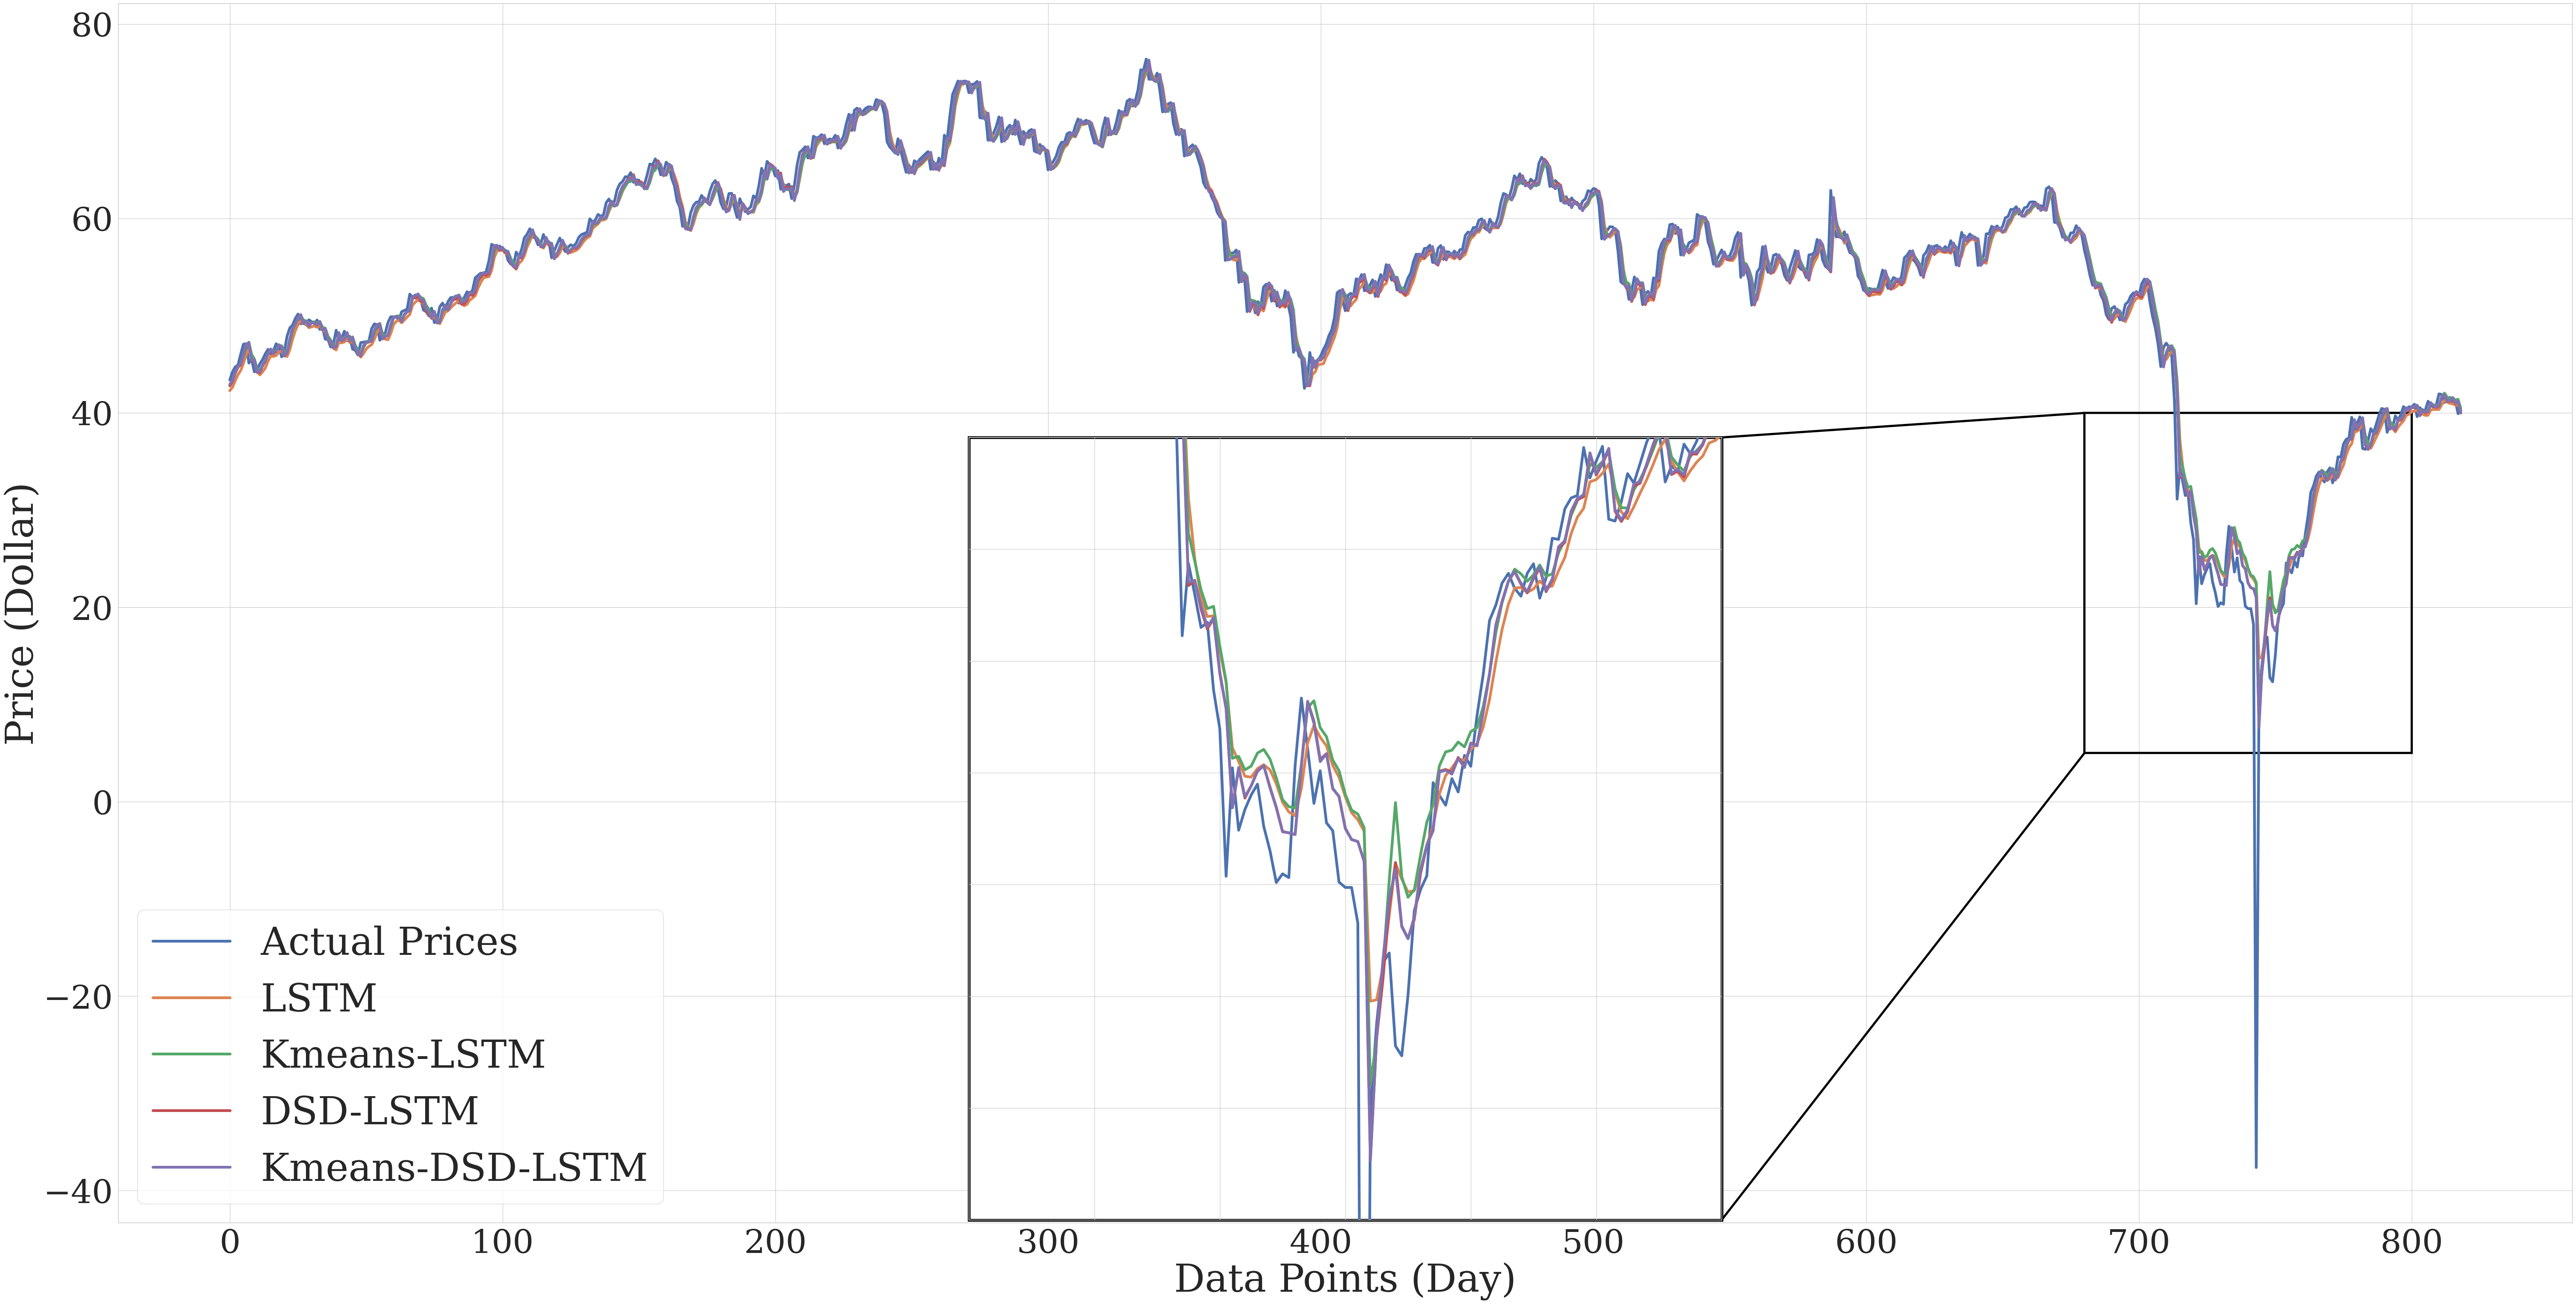

time: 6.86 s (started: 2024-06-11 10:44:05 +00:00)


In [ ]:
plt.figure(figsize=(80, 40))
matplotlib.rc('xtick', labelsize=60)
matplotlib.rc('ytick', labelsize=60)
ax = plt.axes()
ax.set_xlabel('Data Points (Day)', fontsize=70)
ax.set_ylabel('Price (Dollar)', fontsize=70)

ax.plot(wti_test_outputs, label='Actual Prices', linewidth=5)
ax.plot(lstm[1], label='LSTM', linewidth=5)
ax.plot(kmeans_lstm[1], label='Kmeans-LSTM', linewidth=5)
ax.plot(dsd_lstm[1], label='DSD-LSTM', linewidth=5)
ax.plot(kmeans_dsd_lstm[1], label='Kmeans-DSD-LSTM', linewidth=5)

axins = zoomed_inset_axes(ax, 2.3, loc=8) # zoom = 2
axins.plot(wti_test_outputs, label='Actual Prices', linewidth=5)
axins.plot(lstm[1], label='LSTM', linewidth=5)
axins.plot(kmeans_lstm[1], label='Kmeans-LSTM', linewidth=5)
axins.plot(dsd_lstm[1], label='DSD-LSTM', linewidth=5)
axins.plot(kmeans_dsd_lstm[1], label='Kmeans-DSD-LSTM', linewidth=5)
axins.set_xlim(680, 800)
axins.set_ylim(5, 40)

axins.patch.set_edgecolor('black')
axins.patch.set_linewidth(5)
plt.xticks(visible=False)
plt.yticks(visible=False)

ax.legend(fontsize=70)

patch, pp1,pp2 = mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0", linewidth=4)
pp1.loc1 = 1
pp1.loc2 = 2
pp2.loc1 = 4
pp2.loc2 = 3

plt.savefig("WTI.svg", format="svg")
plt.savefig("WTI.png")

plt.draw()
plt.show()

In [ ]:
CURRENT_PROJECT = 'charts'
lstm = read_model_results('LSTM_BRENT', 'best')
CURRENT_PROJECT = 'check-clusterings'
kmeans_lstm = read_model_results('Kmeans_LSTM_Euclidean_BRENT2', 'best')
CURRENT_PROJECT = 'check-sparsities'
dsd_lstm = read_model_results('DSD-LSTM_BRENT35', 'best')
CURRENT_PROJECT = 'ref30'
kmeans_dsd_lstm = read_model_results('Kmeans-DSD-LSTM_BRENT', 'best')

time: 4.37 s (started: 2024-06-11 10:44:11 +00:00)


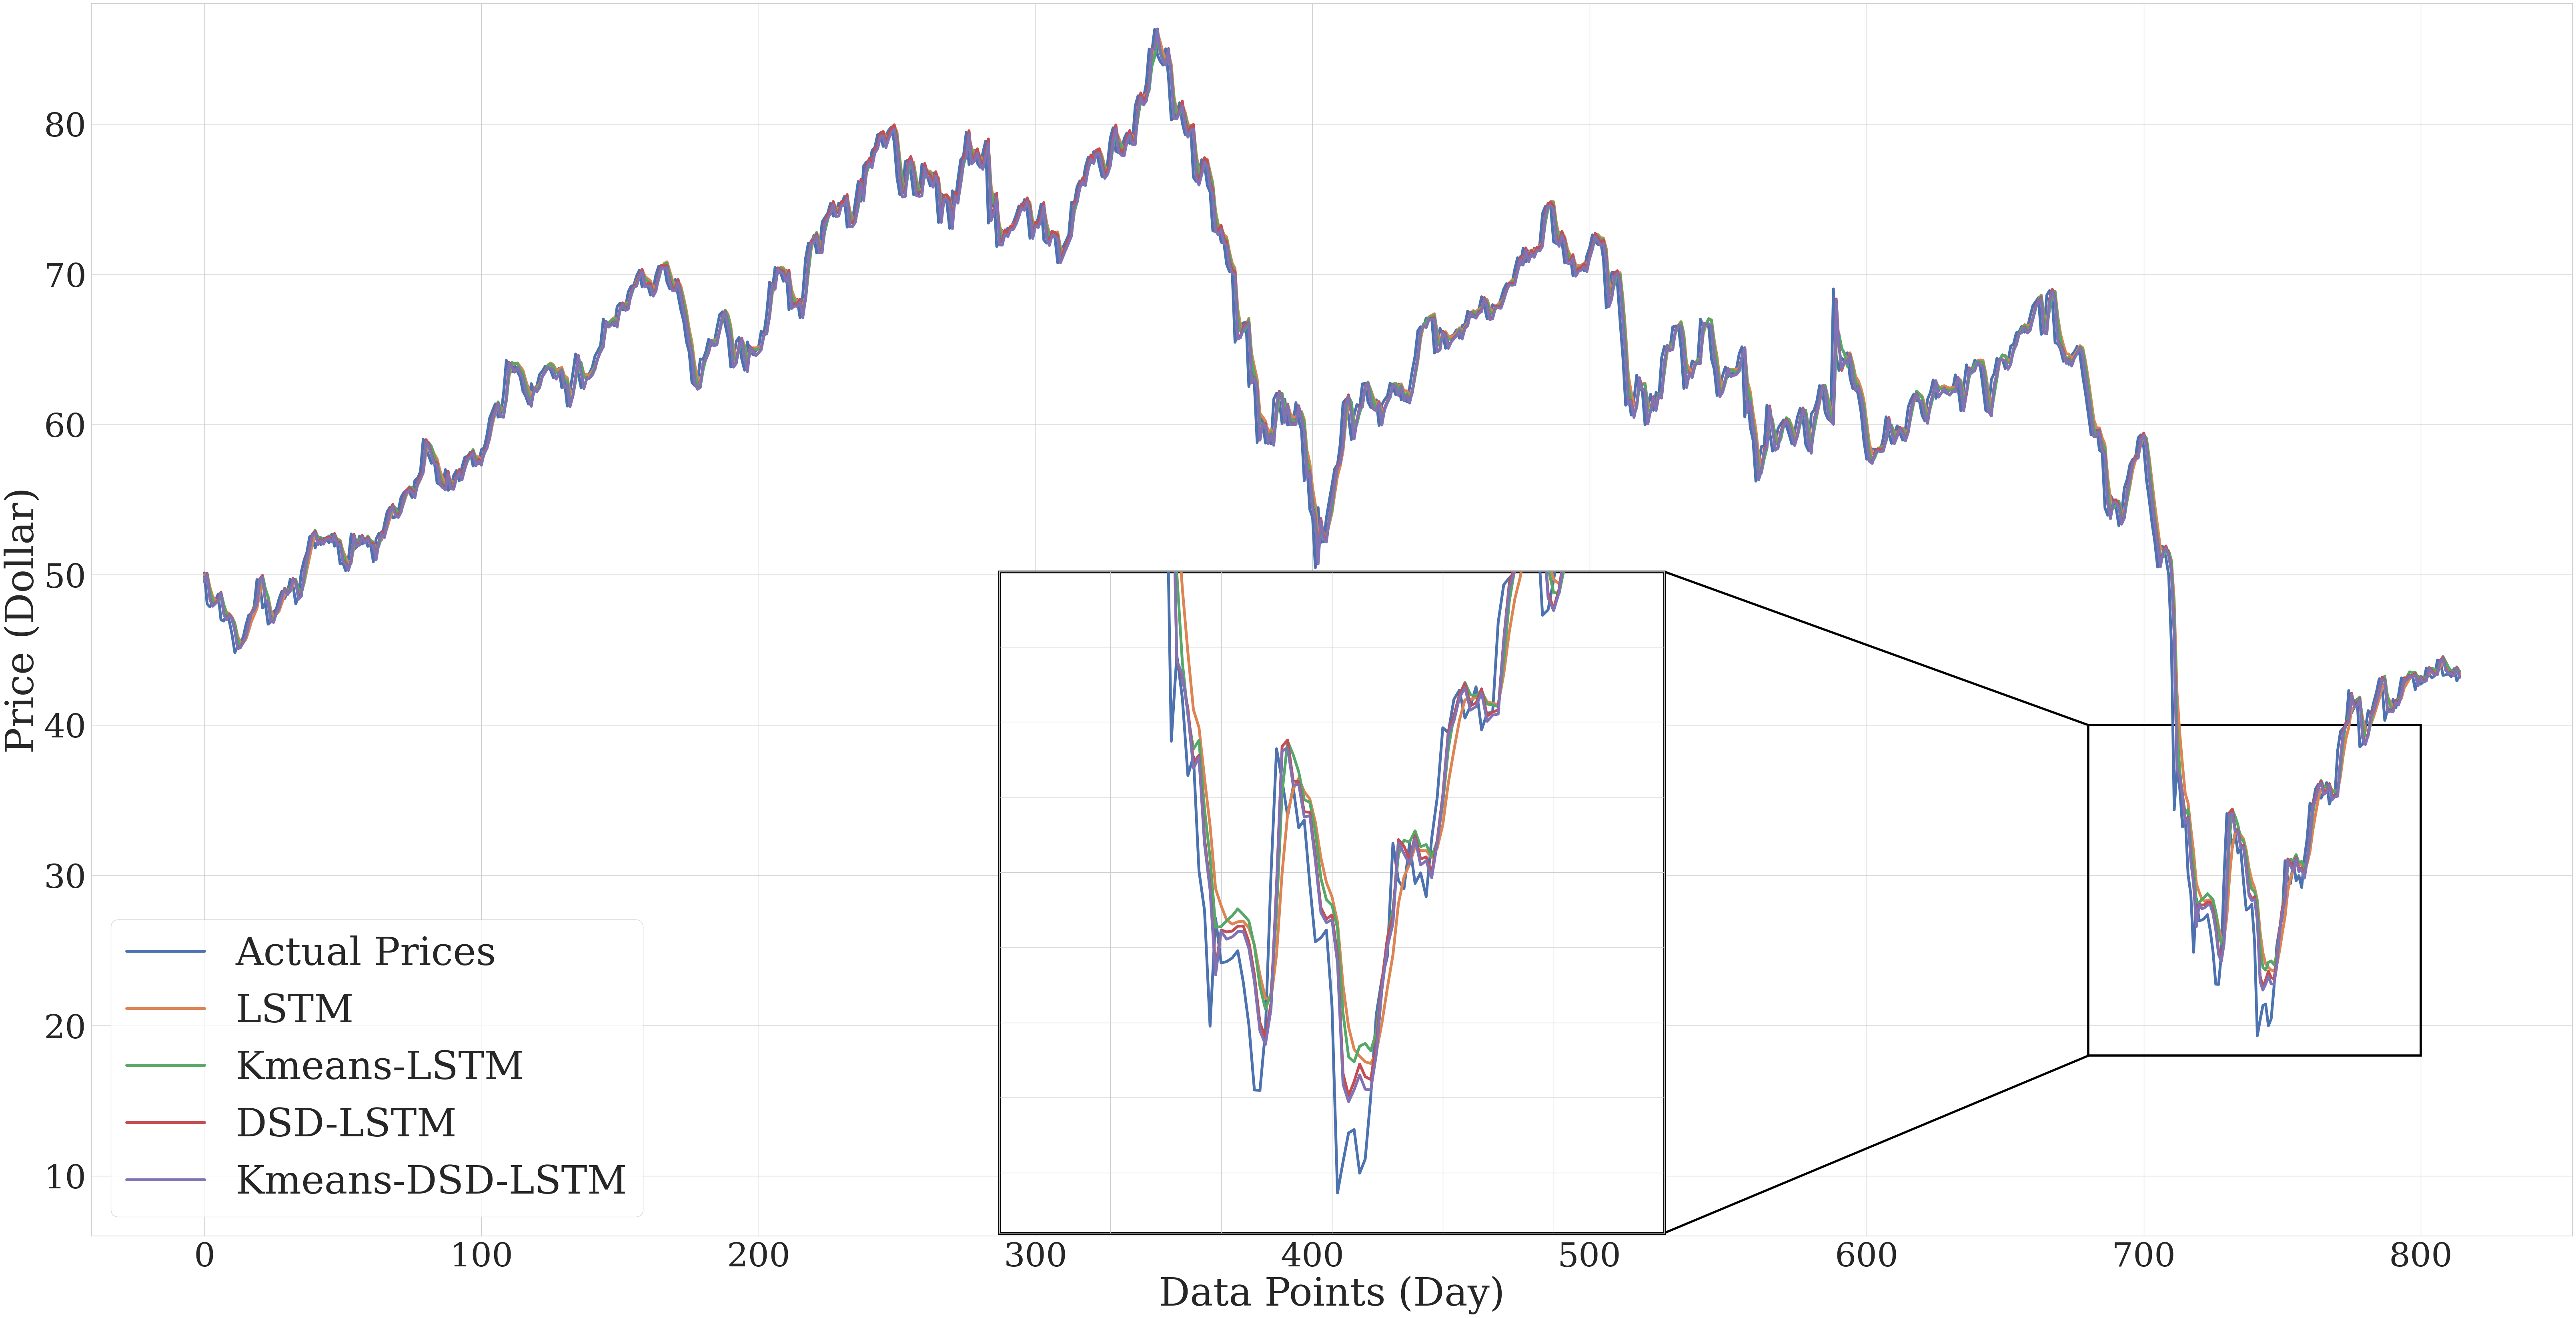

time: 8.08 s (started: 2024-06-11 10:44:16 +00:00)


In [ ]:
plt.figure(figsize=(80, 40))
matplotlib.rc('xtick', labelsize=60)
matplotlib.rc('ytick', labelsize=60)
ax = plt.axes()
ax.set_xlabel('Data Points (Day)', fontsize=70)
ax.set_ylabel('Price (Dollar)', fontsize=70)

ax.plot(brent_test_outputs, label='Actual Prices', linewidth=5)
ax.plot(lstm[1], label='LSTM', linewidth=5)
ax.plot(kmeans_lstm[1], label='Kmeans-LSTM', linewidth=5)
ax.plot(dsd_lstm[1], label='DSD-LSTM', linewidth=5)
ax.plot(kmeans_dsd_lstm[1], label='Kmeans-DSD-LSTM', linewidth=5)
ax.set_ylim(6, 88)

axins = zoomed_inset_axes(ax, 2, loc=8) # zoom = 2
axins.plot(brent_test_outputs, label='Actual Prices', linewidth=5)
axins.plot(lstm[1], label='LSTM', linewidth=5)
axins.plot(kmeans_lstm[1], label='Kmeans-LSTM', linewidth=5)
axins.plot(dsd_lstm[1], label='DSD-LSTM', linewidth=5)
axins.plot(kmeans_dsd_lstm[1], label='Kmeans-DSD-LSTM', linewidth=5)
axins.set_xlim(680, 800)
axins.set_ylim(18, 40)

axins.patch.set_edgecolor('black')
axins.patch.set_linewidth(5)
plt.xticks(visible=False)
plt.yticks(visible=False)

ax.legend(fontsize=70)

patch, pp1,pp2 = mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0", linewidth=4)
pp1.loc1 = 1
pp1.loc2 = 2
pp2.loc1 = 4
pp2.loc2 = 3

plt.savefig("Brent.svg", format="svg")
plt.savefig("Brent.png")

plt.draw()
plt.show()